## An attempt to find closest tracks of a known star

In [7]:
%cd "/home/dutta/Downloads/Summer'24/MIST_codes/scripts"
import read_mist_models

/home/dutta/Downloads/Summer'24/MIST_codes/scripts


In [13]:
%cd "/home/dutta/Downloads/post-AGB"

/home/dutta/Downloads/post-AGB


Reading in: 0010000M.track.eep.cmd
Reading in: 0011000M.track.eep.cmd
Reading in: 0012000M.track.eep.cmd
Reading in: 0013000M.track.eep.cmd
Reading in: 0014000M.track.eep.cmd
Reading in: 0015000M.track.eep.cmd
Reading in: 0016000M.track.eep.cmd
Reading in: 0017000M.track.eep.cmd
Reading in: 0018000M.track.eep.cmd
Reading in: 0019000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0021000M.track.eep.cmd
Reading in: 0022000M.track.eep.cmd
Reading in: 0023000M.track.eep.cmd
Reading in: 0024000M.track.eep.cmd
Reading in: 0025000M.track.eep.cmd
Reading in: 0026000M.track.eep.cmd
Reading in: 0027000M.track.eep.cmd
Reading in: 0028000M.track.eep.cmd
Reading in: 0029000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0031000M.track.eep.cmd
Reading in: 0032000M.track.eep.cmd
Reading in: 0033000M.track.eep.cmd
Reading in: 0034000M.track.eep.cmd
Reading in: 0035000M.track.eep.cmd
Reading in: 0036000M.track.eep.cmd
Reading in: 0037000M.track.eep.cmd
Reading in: 0038000M

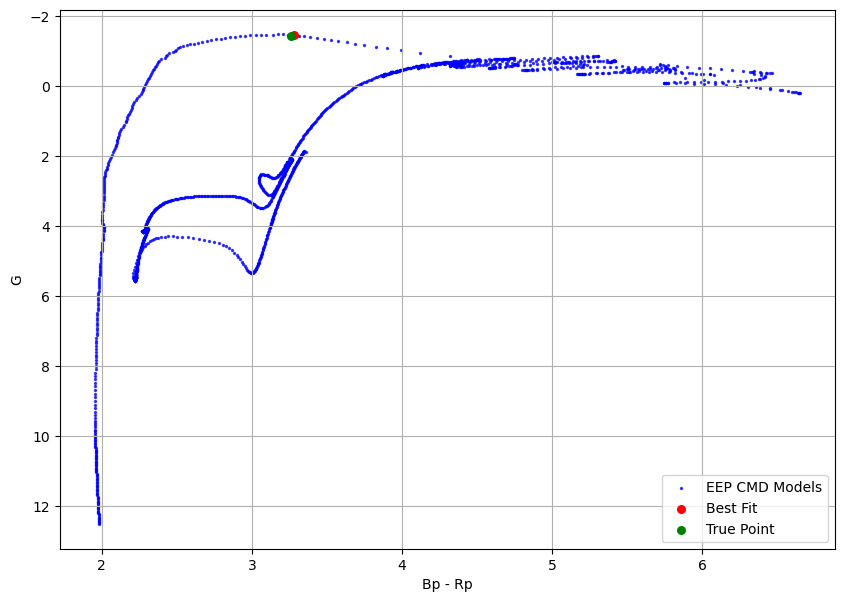

Best match file: 0029000M.track.eep.cmd
Best match Bp_Rp: 3.279096
Best match G: -1.449959
Best match Age: 403999485.8118098


In [41]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Read all .eep.cmd files and extract Bp_Rp and G values
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename
eep_data = []

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[:60]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    bp_rp = B - R
    
    # Store the data for later comparison
    eep_data.append({
        'file': eep_cmd_file,
        'age': A,
        'log_Teff': T,
        'log_L': L,
        'Bp_Rp': bp_rp,
        'G': G
    })

# Step 3: Define the GAIA star data
gaia_Bp_Rp = 0.409 + 2.854  # Replace with actual GAIA Bp_Rp value
gaia_G = -6.427 + 4.998     # Replace with actual GAIA G value

# Step 4: Find the best match
min_diff = float('inf')
best_match = None
best_match_idx = None

for data in eep_data:
    diff = np.abs(data['Bp_Rp'] - gaia_Bp_Rp) + np.abs(data['G'] - gaia_G)
    min_diff_idx = np.argmin(diff)
    if diff[min_diff_idx] < min_diff:
        min_diff = diff[min_diff_idx]
        best_match = data
        best_match_idx = min_diff_idx

# Step 5: Plot the best match
if best_match:
    plt.figure(figsize=(10, 7))
    plt.scatter(best_match['Bp_Rp'], best_match['G'], s=2, color='blue', alpha=0.7, label='EEP CMD Models')
    plt.scatter(best_match['Bp_Rp'][best_match_idx], best_match['G'][best_match_idx], s=30, color='red', label='Best Fit')
    plt.scatter(gaia_Bp_Rp, gaia_G, s=30, color='green', label='True Point')

    # Adding labels and grid
    plt.xlabel('Bp - Rp')
    plt.ylabel('G')
    plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
    plt.grid(True)
    plt.legend()

    # Save the plot to a file
    output_path = 'best_fit_bp_rp_vs_g.png'  # Update with your desired output path
    plt.savefig(output_path, format='png')

    # Show the plot (optional)
    plt.show()
else:
    print("No suitable match found.")

# Print the best match file, values, and age
if best_match:
    print(f"Best match file: {best_match['file']}")
    print(f"Best match Bp_Rp: {best_match['Bp_Rp'][best_match_idx]}")
    print(f"Best match G: {best_match['G'][best_match_idx]}")
    print(f"Best match Age: {best_match['age'][best_match_idx]}")

Reading in: 0029000M.track.eep.cmd


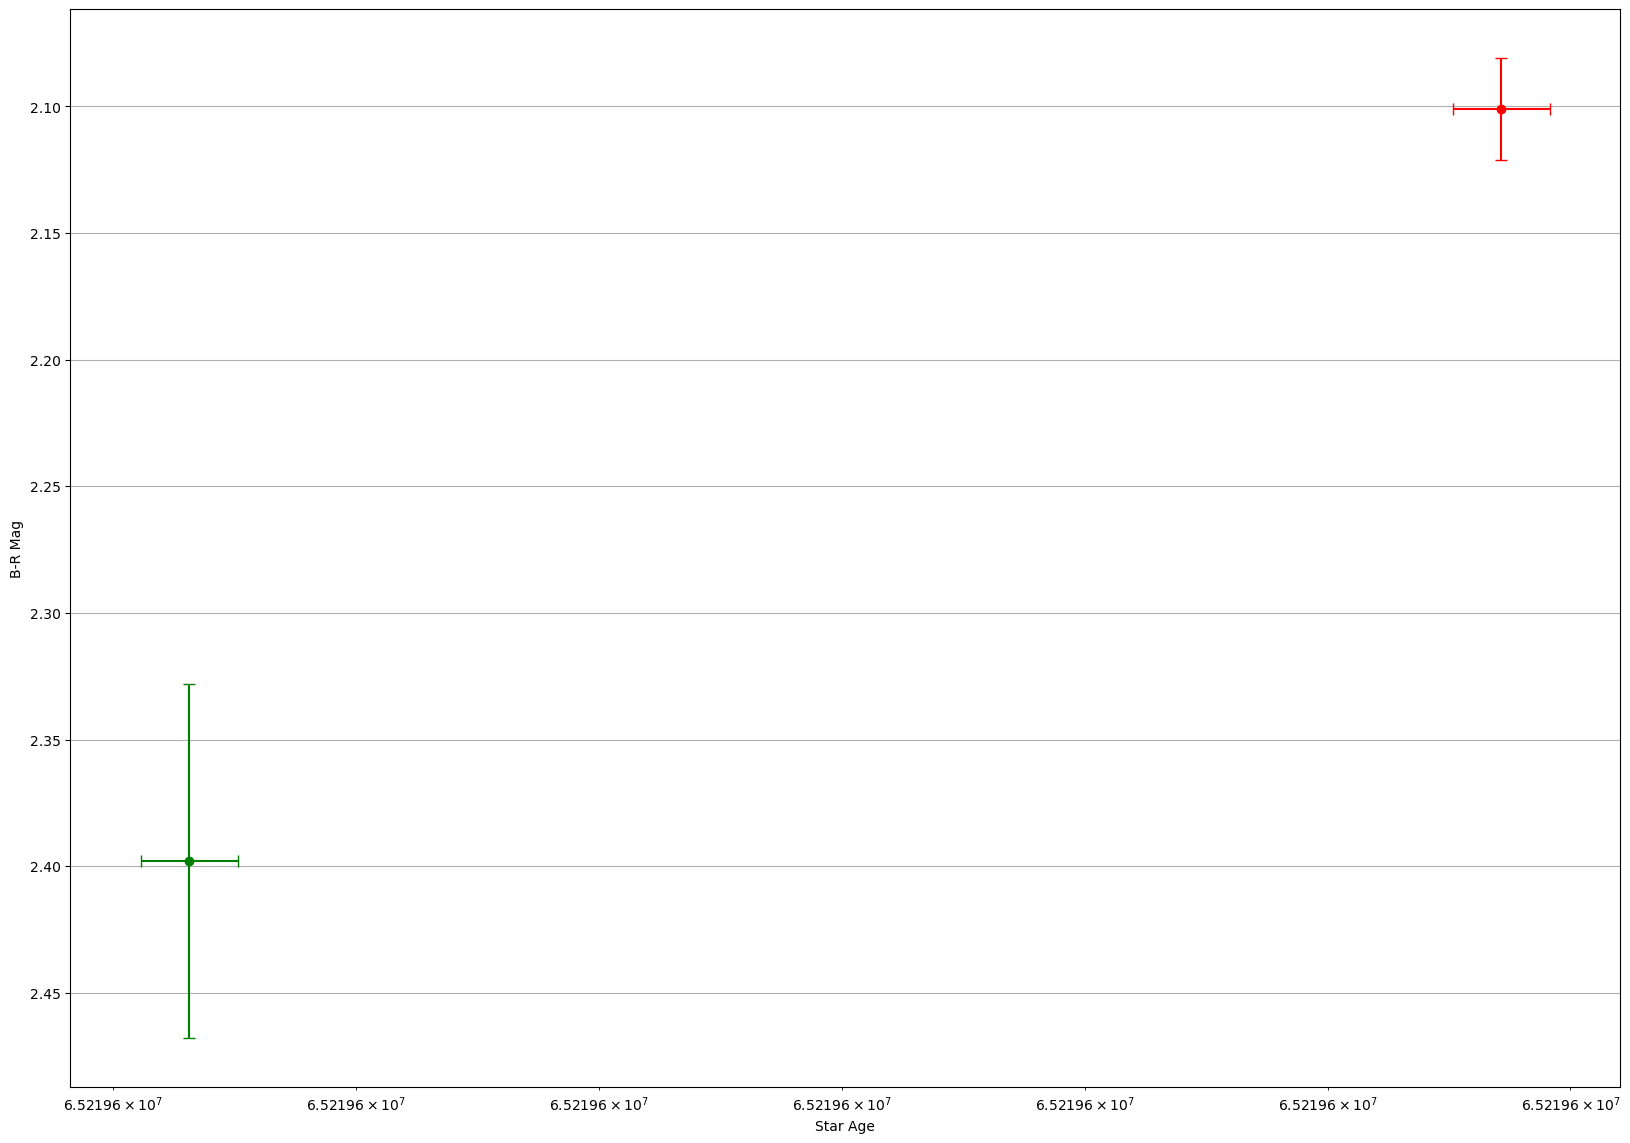

In [44]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()
plt.figure(figsize=(20, 14))

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[19:20]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    # plt.scatter(A, B-R, s=2, color='blue', alpha=0.7)
    
    # Filter the data to include only some ages years
    mask = (P == 6) & (A >= 6.52195e7) & (A <= 6.52197e7)
    A_filtered = A[mask]
    B_filtered = B[mask]
    R_filtered = R[mask]
    
    plt.scatter(A_filtered, B_filtered - R_filtered, s=2, color='blue', alpha=0.7)

# Adding two points:
plt.errorbar(65219627.15, gaia_Bp_Rp, fmt='o', color='red', yerr=0.02, xerr=2.0, capsize=4, label='GAIA DR3')
plt.errorbar(65219573.15, -0.158 + 2.556, fmt='o', color='green', yerr=0.07, xerr=2.0, capsize=4, label='APPLAUSE Archive DR4')

# Adding labels and grid
plt.xlabel('Star Age')
plt.ylabel("B-R Mag")
plt.xscale("log")
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# Save the plot to a file
output_path = '2006425553228658816_B-R.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot (optional)
plt.show()

Reading in: 0010000M.track.eep.cmd
Reading in: 0011000M.track.eep.cmd
Reading in: 0012000M.track.eep.cmd
Reading in: 0013000M.track.eep.cmd
Reading in: 0014000M.track.eep.cmd
Reading in: 0015000M.track.eep.cmd
Reading in: 0016000M.track.eep.cmd
Reading in: 0017000M.track.eep.cmd
Reading in: 0018000M.track.eep.cmd
Reading in: 0019000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0021000M.track.eep.cmd
Reading in: 0022000M.track.eep.cmd
Reading in: 0023000M.track.eep.cmd
Reading in: 0024000M.track.eep.cmd
Reading in: 0025000M.track.eep.cmd
Reading in: 0026000M.track.eep.cmd
Reading in: 0027000M.track.eep.cmd
Reading in: 0028000M.track.eep.cmd
Reading in: 0029000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd


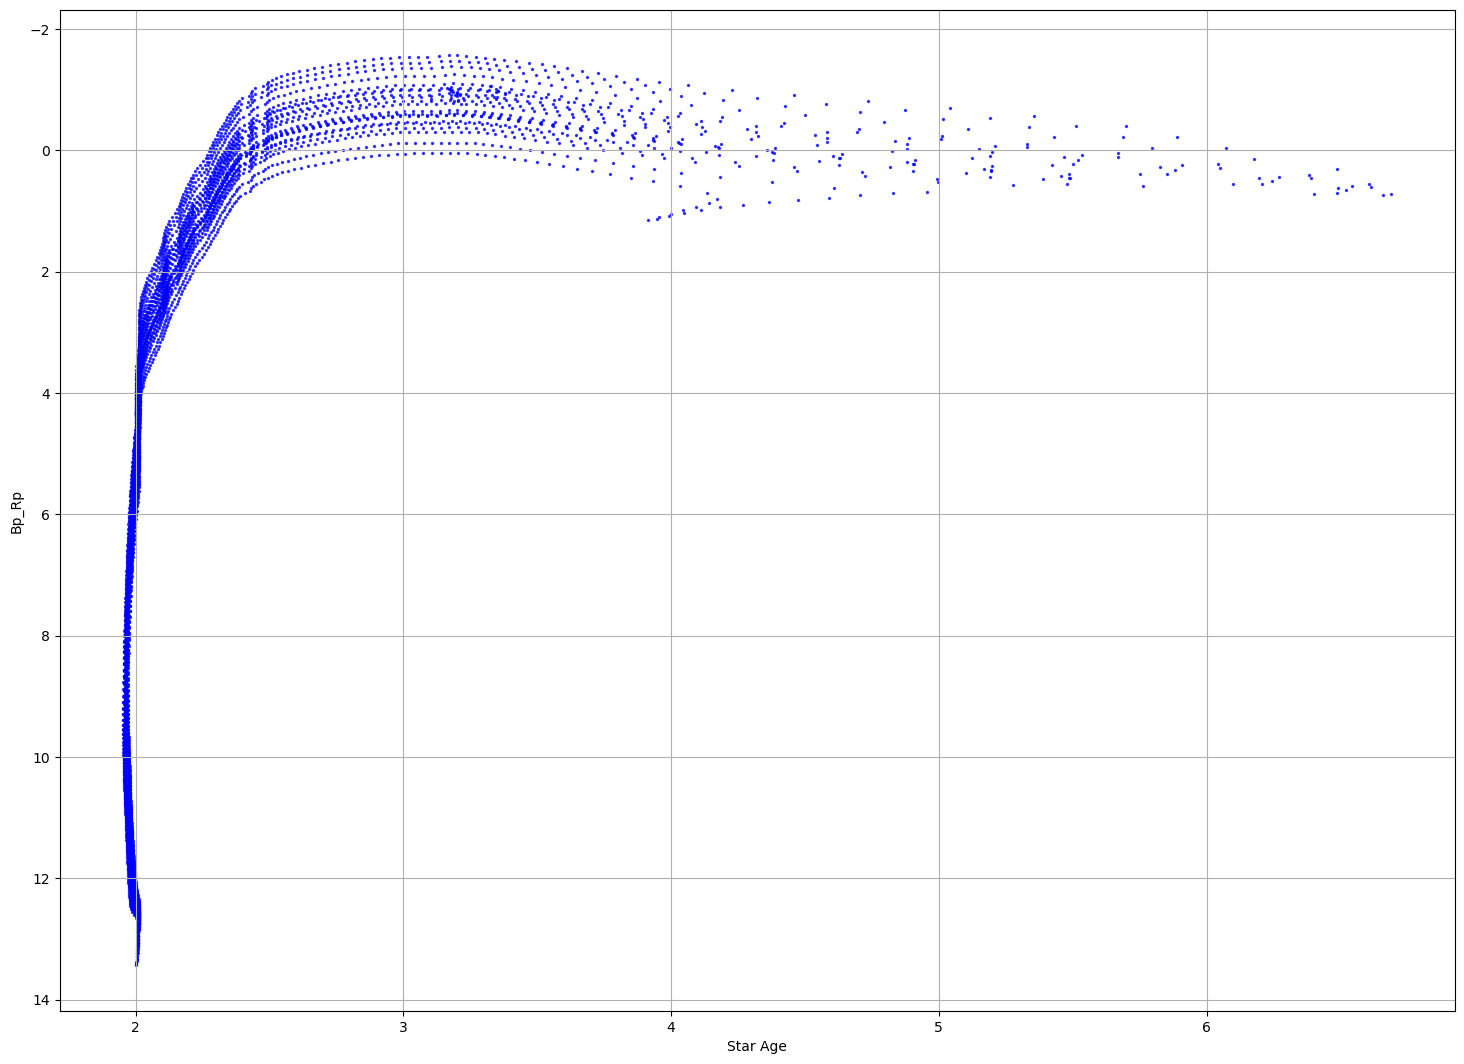

In [59]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Step 2: Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()

# Consider only the first 15 files
eep_cmd_files = eep_cmd_files[:21]
plt.figure(figsize=(18, 13))

# # Consider only the first 15 files
# eep_cmd_files = eep_cmd_files[:1]

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    # plt.scatter(A, B-R, s=2, color='blue', alpha=0.7)
    # eepcmd.plot_CMD(['Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'star_age'], fignum=0, phases=[5, 6])

    # Filter the data to include only some ages years
    mask = (P == 6) #& (A >= 1.353458e9) & (A <= 1.353459e9)
    A_filtered = A[mask]
    B_filtered = B[mask]
    R_filtered = R[mask]
    G_filtered = G[mask]
    
    # plt.scatter(A_filtered, B_filtered - R_filtered, s=2, color='blue', alpha=0.7)
    plt.scatter(B_filtered - R_filtered, G_filtered, s=2, color='blue', alpha=0.7)

# Adding labels and grid
plt.xlabel('Star Age')
plt.ylabel("Bp_Rp")
# plt.scatter(0.932, -5.262, color='green', s=4, label='2164190662780979968')
# plt.xscale("log")
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)

# Show the plot (optional)
plt.show()

Reading in: 0012000M.track.eep.cmd
Reading in: 0013000M.track.eep.cmd


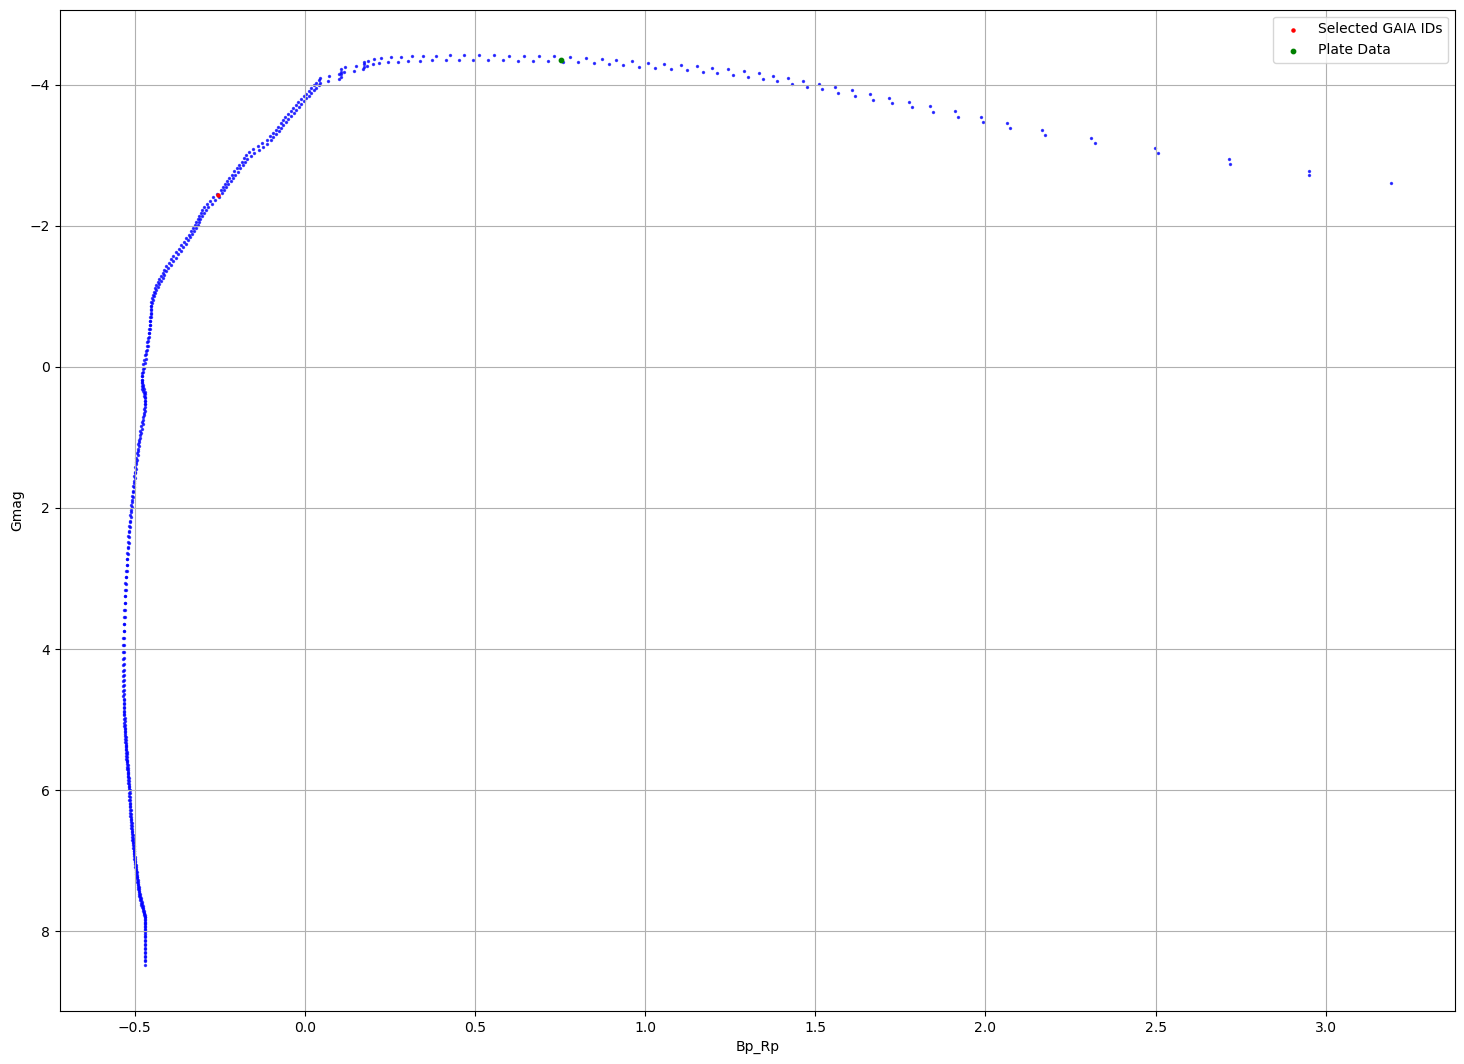

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import read_mist_models

# Assuming we have the data in a text file called 'data.txt'
file_path = 'GAIA_Bp_Rp.txt'

# Step 1: Read the data from the text file into a DataFrame
data = pd.read_csv(file_path, delim_whitespace=True)

# Step 2: Filter the rows based on a given list of GAIA IDs
selected_gaia_ids = [1328057763997734144]
filtered_data = data[data['GAIA_ID'].isin(selected_gaia_ids)]

# Step 3: Extract the `bp_rp` and `Gmag` values for the selected GAIA IDs
bp_rp_values = filtered_data['bp_rp'].values
Gmag_values = filtered_data['Gmag'].values

# Existing plot logic
# Change directory to the folder containing .eep.cmd files
os.chdir('.')  # Update this to your directory path

# Plot all .eep.cmd files in a single plot
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()

# Consider only the first 21 files
eep_cmd_files = eep_cmd_files[4:6]
plt.figure(figsize=(18, 13))

for eep_cmd_file in eep_cmd_files:
    eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
    A = eepcmd.eepcmds['star_age']
    T = eepcmd.eepcmds['log_Teff']
    L = eepcmd.eepcmds['log_L']
    B = eepcmd.eepcmds['Gaia_BP_EDR3']
    R = eepcmd.eepcmds['Gaia_RP_EDR3']
    G = eepcmd.eepcmds['Gaia_G_EDR3']
    P = eepcmd.eepcmds['phase']
    
    mask = (P == 6)
    A_filtered = A[mask]
    B_filtered = B[mask]
    R_filtered = R[mask]
    G_filtered = G[mask]
    
    plt.scatter(B_filtered - R_filtered, G_filtered, s=2, color='blue', alpha=0.7)

# Step 4: Plot the extracted `bp_rp` and `Gmag` values on the existing plot
plt.scatter(bp_rp_values, Gmag_values, color='red', s=5, label='Selected GAIA IDs')
plt.scatter(0.754, -4.352, color='green', s=10, label='Plate Data')

# Adding labels and grid
plt.xlabel('Bp_Rp')
plt.ylabel('Gmag')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [56]:
filtered_data

,GAIA_ID,Bmag,Rmag,Gmag,bp_rp,parallax,azero_gspphot,ag_gspphot,ebpminrp_gspphot


In [49]:
import json

# Read the gaiaedr3_to_plates.txt file to obtain source_ids
# with open('pAGB_gaiaedr3_to_plates_selected.txt', 'r') as file:
with open('pAGB_gaiaedr3_to_plates.txt', 'r') as file:
    gaiaedr3_to_plates = json.load(file)

# Extract source_ids from gaiaedr3_to_plates dictionary
source_ids = [entry['source_id'] for entries in gaiaedr3_to_plates.values() for entry in entries]

print(len(source_ids) * 19 / (200 * 3600), "hrs")

1.0923416666666668 hrs
